# Learning of Recurrent Neural Network with Pytorch
#By- Aarush Kumar
#Dated: October 22,2021

In [1]:
from IPython.display import Image
Image(url='https://miro.medium.com/max/1134/1*XhEOSrXSXFeaKew4R_h8iA.png')

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

In [3]:
train = pd.read_csv(r"/home/aarush100616/Downloads/Projects/RNN with Python/Data/Train/train.csv",dtype = np.float32)

In [4]:
train

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0        1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2        1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3        4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
41996    1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
41997    7.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
41998    6.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
41999    9.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
0         0.0  ...       0.0       0.0       0.0       0.0       0.0   
1         0.0  ...       0.0       0.0       0.0       0.0       0.0   
2         0.0  ...       0.0       0.0       0.0       0.0       0.0   
3         0.0  ...       0.0       0.0       0.0       0.0       0.0   
4         0.0  ...       0.0       0.0       0.0       0.0       0.0   
...       ...  ...       ...       ...       ...       ...       ...   
41995     0.0  ...       0.0       0.0       0.0       0.0       0.0   
41996     0.0  ...       0.0       0.0       0.0       0.0       0.0   
41997     0.0  ...       0.0       0.0       0.0       0.0       0.0   
41998     0.0  ...       0.0       0.0       0.0       0.0       0.0   
41999     0.0  ...       0.0       0.0       0.0       0.0       0.0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
0           0.0       0.0       0.0       0.0       0.0  
1           0.0       0.0       0.0       0.0       0.0  
2           0.0       0.0       0.0       0.0       0.0  
3           0.0       0.0       0.0       0.0       0.0  
4           0.0       0.0       0.0       0.0       0.0  
...         ...       ...       ...       ...       ...  
41995       0.0       0.0       0.0       0.0       0.0  
41996       0.0       0.0       0.0       0.0       0.0  
41997       0.0       0.0       0.0       0.0       0.0  
41998       0.0       0.0       0.0       0.0       0.0  
41999       0.0       0.0       0.0       0.0       0.0  

[42000 rows x 785 columns]

In [5]:
targets_numpy = train.label.values
features_numpy = train.loc[:,train.columns != "label"].values/255

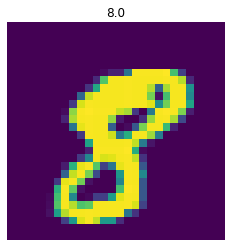

In [6]:
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size = 0.2,
                                                                             random_state = 42) 
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor)
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor)
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)
train = TensorDataset(featuresTrain,targetsTrain)
test = TensorDataset(featuresTest,targetsTest)
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)
plt.imshow(features_numpy[10].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[10]))
plt.savefig('graph.png')
plt.show()

In [7]:
# Create RNN Model
class RNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(RNNModel, self).__init__()
        # Number of hidden dimensions
        self.hidden_dim = hidden_dim
        # Number of hidden layers
        self.layer_dim = layer_dim
        # RNN
        self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim, batch_first=True, nonlinearity='relu')
        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)
    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim))
        # One time step
        out, hn = self.rnn(x, h0)
        out = self.fc(out[:, -1, :]) 
        return out
# batch_size, epoch and iteration
batch_size = 100
n_iters = 8000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)
# Pytorch train and test sets
train = TensorDataset(featuresTrain,targetsTrain)
test = TensorDataset(featuresTest,targetsTest)
# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)
# Create RNN
input_dim = 28    # input dimension
hidden_dim = 100  # hidden layer dimension
layer_dim = 1     # number of hidden layers
output_dim = 10   # output dimension
model = RNNModel(input_dim, hidden_dim, layer_dim, output_dim)
# Cross Entropy Loss 
error = nn.CrossEntropyLoss()
# SGD Optimizer
learning_rate = 0.05
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [10]:
seq_dim = 28  
loss_list = []
iteration_list = []
accuracy_list = []
count = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        train  = Variable(images.view(-1, seq_dim, input_dim))
        labels = Variable(labels )
        # Clear gradients
        optimizer.zero_grad()
        # Forward propagation
        outputs = model(train)
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        # Calculating gradients
        loss.backward()
        # Update parameters
        optimizer.step()
        count += 1
        if count % 250 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                images = Variable(images.view(-1, seq_dim, input_dim))
                # Forward propagation
                outputs = model(images)
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                # Total number of labels
                total += labels.size(0)
                correct += (predicted == labels).sum()
            accuracy = 100 * correct / float(total)
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)

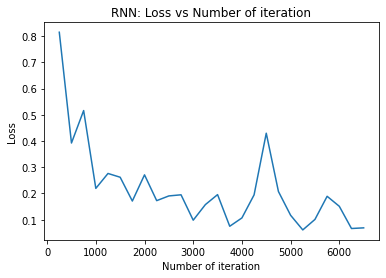

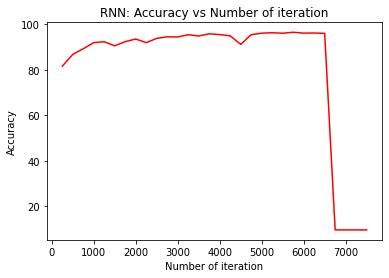

In [11]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("RNN: Loss vs Number of iteration")
plt.show()
# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("RNN: Accuracy vs Number of iteration")
plt.savefig('graph.png')
plt.show()